# XSEC Intensity comparison

In [3]:
import matplotlib.pyplot as plt
import pickle
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
import scipy
from nxcals.api.extraction.data.builders import *

import matplotlib
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

In [11]:
with open('rfko_gain_dataframe.pickle', 'rb') as f:
    df_gain = pickle.load(f)

# This part I've added recently so you might have to delete it if things break
df_gain = df_gain.sort_values(by="timestamp")
df_gain.reset_index(drop=True, inplace=True)
df_gain

timestamp  gain   voltage  energy
0     2022-11-23 13:36:52.055393   0.0 -1.797904     750
1     2022-11-23 14:00:08.013204   0.2 -1.802794    1000
2     2022-11-23 14:00:18.072143   0.2 -1.797904    1000
3     2022-11-23 14:01:14.473057   0.2 -1.797904    1000
4     2022-11-23 14:02:10.872117   0.3 -1.797904    1000
...                          ...   ...       ...     ...
14720 2022-11-28 06:15:10.871628   0.2 -1.797904     750
14721 2022-11-28 06:15:39.671301   0.2 -1.797904     750
14722 2022-11-28 06:16:08.471919   0.2 -1.797904     750
14723 2022-11-28 06:16:37.271326   0.2 -1.797904     750
14724 2022-11-28 06:17:06.071700   0.2 -1.802794     750

[14725 rows x 4 columns]

In [4]:
start = "2022-11-23 12:00:00.000"
end = "2022-11-25 05:00:00.000"

In [49]:
df_xsec23 = DevicePropertyDataQuery.builder(spark).system("CMW").startTime(start).endTime(end).entity().parameter("T08.XSEC070-I/IntensityMeasurement").build().toPandas()
df_xsec23 = df_xsec23.sort_values(by=["acqStamp"])
df_xsec23 = df_xsec23.where( (df_xsec23.selector == "CPS.USER.EAST4") | (df_xsec23.selector == "CPS.USER.EAST3") | (df_xsec23.selector == "CPS.USER.MD5"))
df_xsec23 = df_xsec23.dropna()
df_xsec23.reset_index(inplace=True, drop=True)

/cvmfs/sft.cern.ch/lcg/views/LCG_102b_nxcals_pro/x86_64-centos7-gcc11-opt/python/pyspark/sql/dataframe.py:127: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


In [52]:
df_xsec23["timestamp"] = df_xsec23["acqStamp"]/1000000000
df_xsec23["timestamp"] = [datetime.fromtimestamp(x) for x in df_xsec23["timestamp"]]

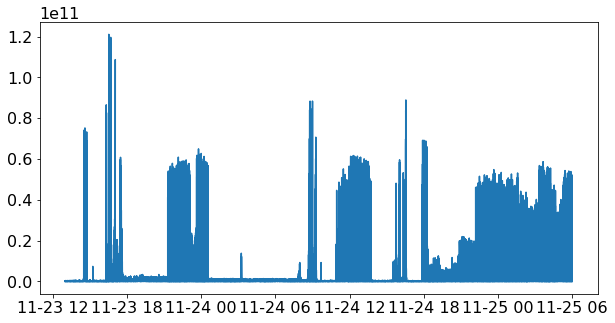

In [53]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df.timestamp, df.intensity)

In [54]:
df_xsec23['closest_datetime'] = df_xsec23['timestamp'].map(lambda x: df_gain.timestamp[(df_gain.timestamp - x).abs().idxmin()])

df_xsec23["gain"] = df_xsec23['closest_datetime'].map(lambda x: df_gain.gain[df_gain.timestamp==x])
df_xsec23["energy"] = df_xsec23['closest_datetime'].map(lambda x: df_gain.energy[df_gain.timestamp==x])

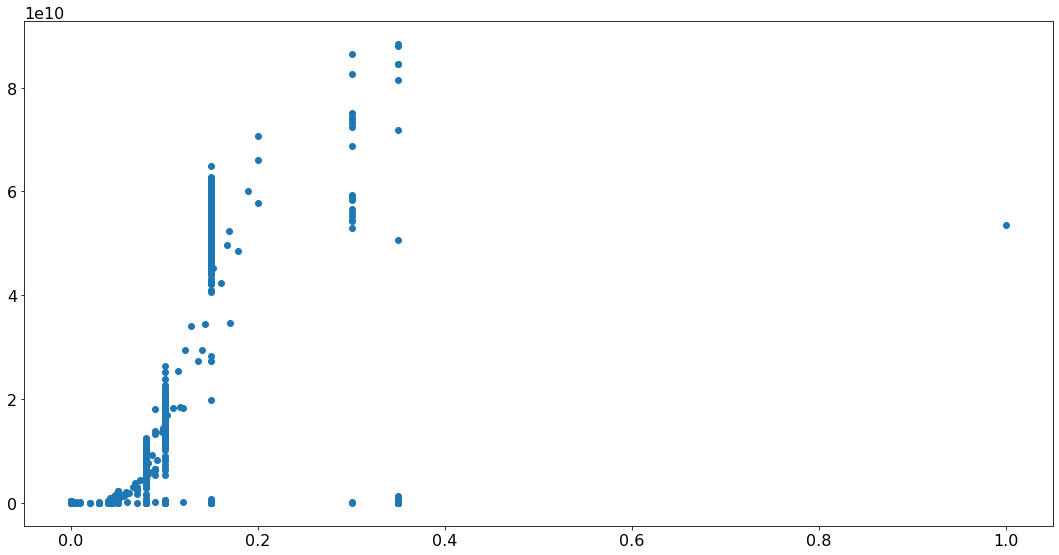

In [60]:
fig, ax = plt.subplots(tight_layout=True, figsize=(15,8))
ax.scatter(df_xsec23.where(df_xsec23.selector == "CPS.USER.EAST3").gain, df_xsec23.where(df_xsec23.selector == "CPS.USER.EAST3").intensity)